<a href="https://colab.research.google.com/github/faiyazansari566/Projects-practice/blob/main/Avacado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [30]:
df.shape

(16468, 14)

In [25]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [27]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [19]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   float64
 12  region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [28]:
df.isnull().sum() ##checking null values

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [33]:
df2 = df.dropna()
df2.shape

(1517, 14)

In [34]:
df2.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [35]:
## no null values

In [36]:
df2['Date'] = pd.to_datetime(df2['Date'])

In [42]:
df2['dayofweek'] = df2['Date'].dt.dayofweek  ##monday 0 --- sunday 6

In [41]:
##df2['Date'].dt.weekday_name

In [43]:
## trying to find weekends and weekdays

In [53]:
df2['is_weekend'] = 0
for i in range(0,len(df2)):
   if (df2['dayofweek'][i]==5) | (df2['dayofweek'][i]==6):
        df2['is_weekend'][i]=1
   else:
        df2['is_weekend'][i]=0

In [57]:
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,dayofweek,is_weekend
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,6,1
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,6,1
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,6,1
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,4,0
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,6,1


In [58]:
df2['is_weekend'].value_counts()

1    1051
0     466
Name: is_weekend, dtype: int64

In [59]:
df2['dayofweek'].value_counts()

6    992
0    149
4    128
1    111
5     59
3     54
2     24
Name: dayofweek, dtype: int64

In [63]:
df2.groupby('dayofweek').mean()[['AveragePrice']]

,AveragePrice
dayofweek,
0,1.081208
1,1.035586
2,1.052917
3,1.014259
4,1.033047
5,1.120678
6,1.085000


In [65]:
pd.crosstab(df2['dayofweek'],df2['region'])

region,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,Columbus,DallasFtWorth,Denver,Detroit,GrandRapids,GreatLakes,HarrisburgScranton,HartfordSpringfield,Houston,Indianapolis,Jacksonville,LasVegas,LosAngeles,Louisville,MiamiFtLauderdale,Midsouth,Nashville,NewYork,Northeast,NorthernNewEngland,Orlando,Philadelphia,PhoenixTucson,Pittsburgh,Plains,Portland,RaleighGreensboro,RichmondNorfolk,Roanoke,SanDiego,SanFrancisco,Seattle,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
dayofweek,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,5,4,4,5,3,1,5,4,4,5,3,4,4,5,4,3,0,5,2,4,1,0,3,2,0,4,5,1,1,4,1,5,0,1,2,2,0,4,4,2,0,4,4,0,5,3,3,3,4,3,4
1,5,6,8,5,5,6,7,1,1,4,0,0,4,0,0,0,2,1,0,4,0,0,4,0,3,0,4,0,4,0,0,4,4,0,4,0,4,0,4,0,1,0,4,0,4,0,0,4,0,4,0
2,2,0,0,2,1,0,2,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1
3,2,2,2,2,1,0,2,1,2,2,1,1,2,2,1,1,0,2,0,2,0,0,1,0,0,2,2,0,1,1,0,2,0,0,1,0,0,1,2,0,0,1,2,0,2,1,1,1,1,2,2
4,4,6,7,4,8,7,7,1,1,3,2,2,3,1,1,2,2,2,2,3,1,0,2,2,2,2,3,1,2,2,1,4,2,1,2,2,2,1,3,2,1,2,3,1,4,2,2,2,2,2,2
5,4,1,2,6,6,3,6,4,0,1,1,1,0,1,1,1,0,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,0,1,0,1,0,1,1,1,1,0,1,0,1
6,45,35,42,41,38,34,47,19,15,32,10,15,27,14,11,11,9,18,10,28,7,2,24,11,13,16,29,8,21,13,9,35,16,8,21,10,15,10,25,9,7,15,26,6,33,9,11,24,16,25,17


In [67]:
## more sales on sundays can be seen in all the regions

In [68]:
df2.groupby('dayofweek').mean()[['Total Bags']]

,Total Bags
dayofweek,
0,316409.810671
1,243842.005586
2,440893.894583
3,282185.857593
4,317899.742812
5,371215.203729
6,285043.751391


In [ ]:
## max bag sales is on wed

In [70]:
df2.groupby('dayofweek').mean()[['AveragePrice']]

,AveragePrice
dayofweek,
0,1.081208
1,1.035586
2,1.052917
3,1.014259
4,1.033047
5,1.120678
6,1.085000


In [71]:
#definitely price will approx same on all days

In [73]:
df2.groupby('is_weekend').mean()[['AveragePrice']]

,AveragePrice
is_weekend,
0,1.047897
1,1.087003


In [74]:
# same conclusions

In [95]:
## univariate and bivriate analysis

In [76]:
df2.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,dayofweek,is_weekend
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,6,1
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,6,1
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,6,1
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,4,0
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,6,1


In [77]:
df2['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [78]:
df2.drop('type',axis=1,inplace=True)

In [79]:
df2['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

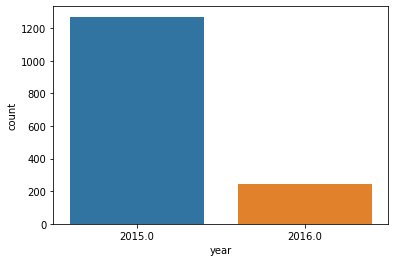

In [80]:
sns.countplot(df2['year'])

In [82]:
pd.crosstab(df2['year'],df2['AveragePrice'].mean())

col_0,1.07499
year,
2015.0,1270
2016.0,247


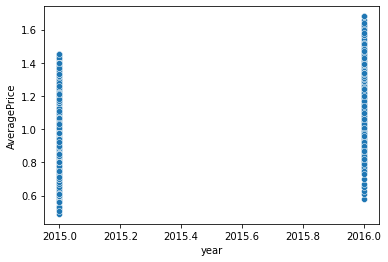

In [83]:
sns.scatterplot(df2['year'],df2['AveragePrice'])

In [84]:
## year is not showing any significance and also it vil affect the linear model...hence we can drop that

In [93]:
df2.drop('year',axis=1,inplace=True)

KeyError: ignored

In [90]:
df2.drop(['Unnamed: 0','Date'],axis=1,inplace=True)

In [92]:
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,dayofweek,is_weekend
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,Albany,6,1
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,Albany,6,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,Albany,6,1
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,Albany,4,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,Albany,6,1


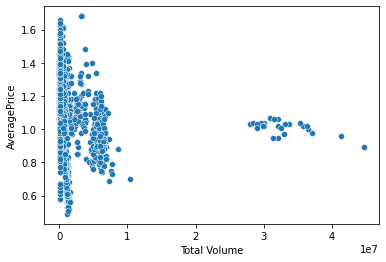

In [94]:
sns.scatterplot(df2['Total Volume'],df2['AveragePrice'])

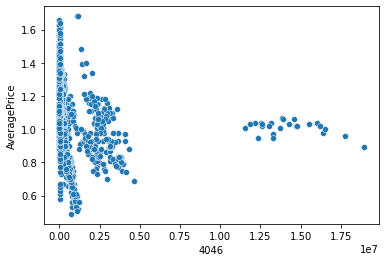

In [97]:
sns.scatterplot(df2['4046'],df2['AveragePrice'])

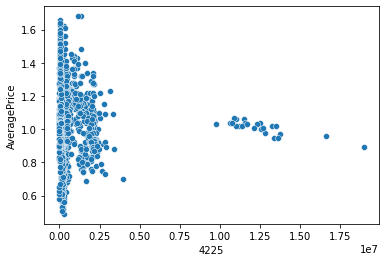

In [98]:
sns.scatterplot(df2['4225'],df2['AveragePrice'])

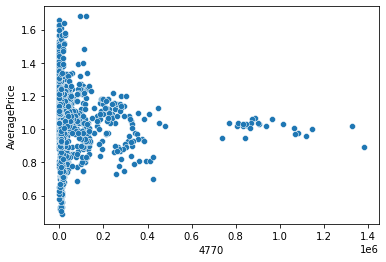

In [99]:
sns.scatterplot(df2['4770'],df2['AveragePrice'])

In [100]:
df2.drop(['4046','4225','4770'],axis=1,inplace=True)

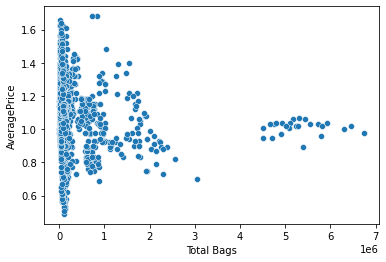

In [101]:
sns.scatterplot(df2['Total Bags'],df2['AveragePrice'])

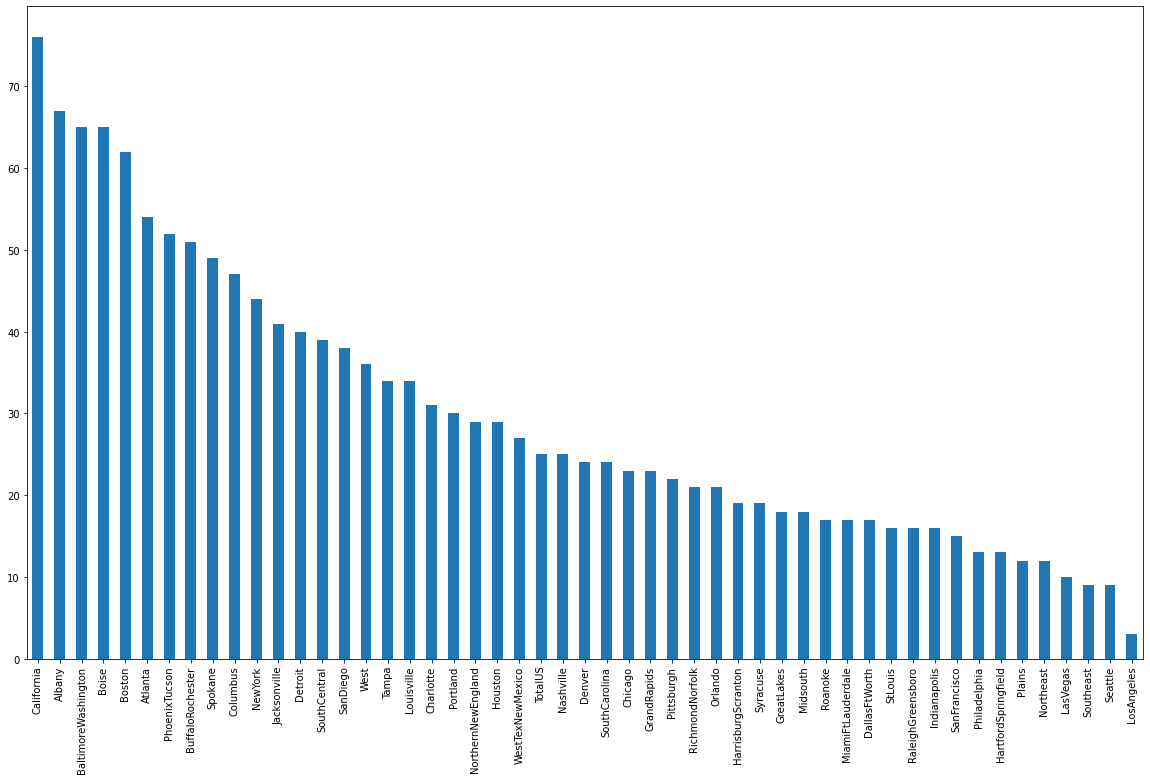

In [106]:
plt.figure(figsize=(20,12))
df2['region'].value_counts().plot.bar()

In [107]:
#most number of sales are from california albany and baltimore

In [108]:
df2.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,region,dayofweek,is_weekend
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,Albany,6,1
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,Albany,6,1
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,Albany,6,1
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,Albany,4,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,Albany,6,1


In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['region'] = pd.DataFrame(le.fit_transform(df2['region']))


In [110]:
df2.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,region,dayofweek,is_weekend
0,1.33,64236.62,8696.87,8603.62,93.25,0.0,0,6,1
1,1.35,54876.98,9505.56,9408.07,97.49,0.0,0,6,1
2,0.93,118220.22,8145.35,8042.21,103.14,0.0,0,6,1
3,1.08,78992.15,5811.16,5677.40,133.76,0.0,0,4,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.0,0,6,1


In [113]:
## scaling the data since independent features are larger than dependent features .

In [114]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df_scaled = pd.DataFrame(mms.fit_transform(df2),columns=df2.columns)

In [116]:
df_scaled.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,region,dayofweek,is_weekend
0,0.705882,0.000571,0.000800,0.000898,0.000083,0.0,0.0,1.000000,1.0
1,0.722689,0.000361,0.000920,0.001035,0.000087,0.0,0.0,1.000000,1.0
2,0.369748,0.001781,0.000718,0.000803,0.000092,0.0,0.0,1.000000,1.0
3,0.495798,0.000902,0.000371,0.000402,0.000119,0.0,0.0,0.666667,0.0
4,0.663866,0.000275,0.000427,0.000454,0.000176,0.0,0.0,1.000000,1.0


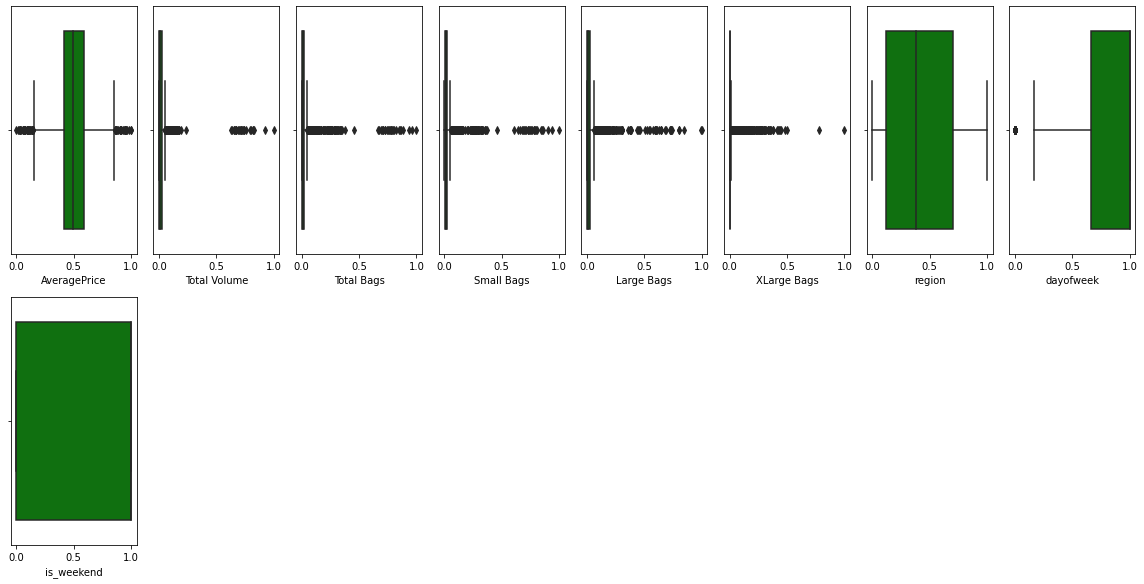

In [118]:
cols=df_scaled.columns.values
plt.figure(figsize=(16,32))
for i in range(len(cols)):
    plt.subplot(8,8,i+1)
    sns.boxplot(df_scaled[cols[i]], color='green', orient='v')
    plt.tight_layout()

In [119]:
from scipy.stats import zscore
z = np.abs(zscore(df_scaled))

In [121]:
len(np.where(z>3)[0])

168

In [126]:
df3 = df2[(z<3).all(axis=1)]

In [128]:
df2.shape , df3.shape

((1517, 9), (1436, 9))

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,region,dayofweek,is_weekend
0,1.33,64236.62,8696.87,8603.62,93.25,0.00,0,6,1
1,1.35,54876.98,9505.56,9408.07,97.49,0.00,0,6,1
2,0.93,118220.22,8145.35,8042.21,103.14,0.00,0,6,1
3,1.08,78992.15,5811.16,5677.40,133.76,0.00,0,4,0
4,1.28,51039.60,6183.95,5986.26,197.69,0.00,0,6,1
...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,59418.46,48823.53,10354.65,240.28,7,6,1
1513,1.51,178235.75,63300.70,54704.14,8596.56,0.00,7,5,1
1514,1.48,178410.82,62415.77,53332.61,8258.16,825.00,7,2,0
1515,1.47,189131.52,63931.73,55653.47,8278.26,0.00,7,6,1


In [133]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df3_scaled = pd.DataFrame(mms.fit_transform(df3),columns=df3.columns)

In [135]:
df3_scaled.head()

,AveragePrice,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,region,dayofweek,is_weekend
0,0.725664,0.002988,0.002255,0.002497,0.000272,0.0,0.0,1.000000,1.0
1,0.743363,0.001891,0.002593,0.002876,0.000284,0.0,0.0,1.000000,1.0
2,0.371681,0.009318,0.002024,0.002232,0.000300,0.0,0.0,1.000000,1.0
3,0.504425,0.004718,0.001046,0.001116,0.000390,0.0,0.0,0.666667,0.0
4,0.681416,0.001441,0.001202,0.001262,0.000576,0.0,0.0,1.000000,1.0


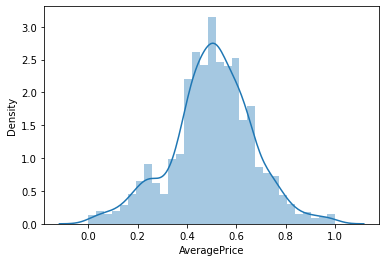

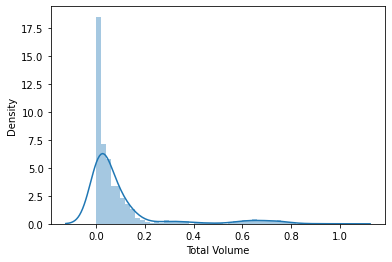

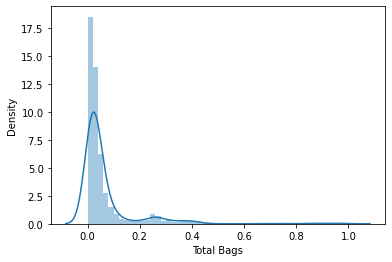

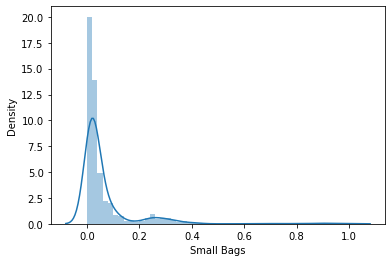

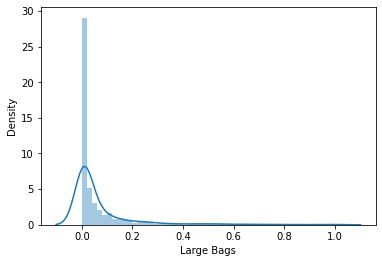

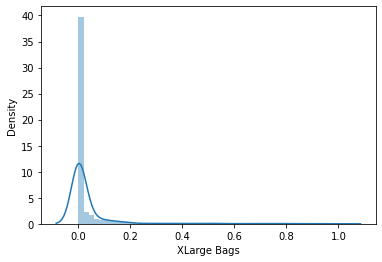

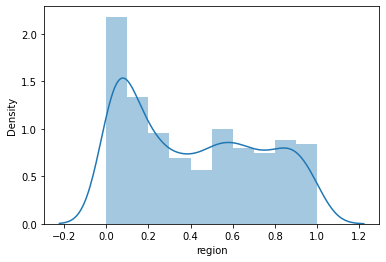

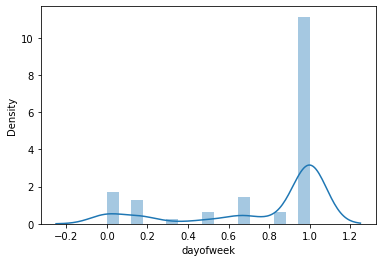

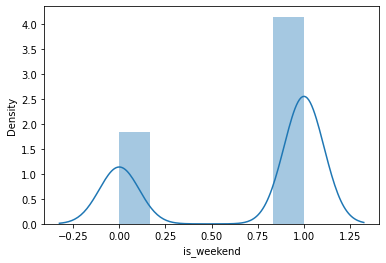

In [137]:
for i in df3_scaled.columns:
  plt.subplots()
  sns.distplot(df3_scaled[i])

In [138]:
df3_scaled.skew()

AveragePrice   -0.184770
Total Volume    2.704085
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
region          0.276276
dayofweek      -1.289304
is_weekend     -0.830119
dtype: float64

In [139]:
df4 = df3_scaled.copy()

In [140]:
df4['Total Volume'] = np.sqrt(df3_scaled['Total Volume'])
df4['Total Bags'] = np.sqrt(df3_scaled['Total Bags'])
df4['Small Bags'] = np.sqrt(df3_scaled['Small Bags'])
df4['Large Bags'] = np.sqrt(df3_scaled['Large Bags'])

In [142]:
df4['XLarge Bags'] = np.sqrt(df3_scaled['XLarge Bags'])
df4['dayofweek'] = np.sqrt(df3_scaled['dayofweek'])

In [143]:
df4.skew()

AveragePrice   -0.184770
Total Volume    1.685787
Total Bags      2.114615
Small Bags      2.117871
Large Bags      1.696494
XLarge Bags     2.826879
region          0.276276
dayofweek      -1.738250
is_weekend     -0.830119
dtype: float64

In [144]:
df4['Total Volume'] = np.cbrt(df3_scaled['Total Volume'])
df4['Total Bags'] = np.cbrt(df3_scaled['Total Bags'])
df4['Small Bags'] = np.cbrt(df3_scaled['Small Bags'])
df4['Large Bags'] = np.cbrt(df3_scaled['Large Bags'])
df4['XLarge Bags'] = np.cbrt(df3_scaled['XLarge Bags'])
df4['dayofweek'] = np.cbrt(df3_scaled['dayofweek'])

In [145]:
df4.skew()

AveragePrice   -0.184770
Total Volume    1.167083
Total Bags      1.466923
Small Bags      1.445768
Large Bags      0.933361
XLarge Bags     1.867443
region          0.276276
dayofweek      -2.040522
is_weekend     -0.830119
dtype: float64

In [146]:
## skewness has improved alot

In [150]:
## building models

In [148]:
x = df4.drop('AveragePrice',axis=1)
y = df4['AveragePrice']

In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [151]:
def get_score(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    train_score=m.score(x_train,y_train)
    pred=m.predict(x_test)
    test_score=r2_score(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return train_score,test_score,rmse

In [152]:
def get_metrics(m,x,y,rs=45):
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.25,random_state=rs)
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    mse=mean_squared_error(pred,y_test)
    mae=mean_absolute_error(pred,y_test)
    rmse=np.sqrt(mean_squared_error(pred,y_test))
    return mse,rmse,mae

In [153]:
def cross(m,x,y,c=5):
    score=cross_val_score(m,x,y,cv=c,n_jobs=-1)
    return (score.mean(), score.std())

In [154]:
lr=LinearRegression(n_jobs=-1)
dt=DecisionTreeRegressor(random_state=90)
svr=SVR()
knn=KNeighborsRegressor(n_jobs=-1)
rid=Ridge(random_state=90)
ls=Lasso(random_state=90)
rf=RandomForestRegressor(n_jobs=-1,random_state=90)
xgb=XGBRegressor(n_jobs=-1,random_state=90)
ada=AdaBoostRegressor(random_state=90)

In [155]:
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))

LR  (0.2945905257977415, -1.475156436567005, 0.13562866136473953)
DT  (1.0, 0.58773060131541, 0.11166000615870027)
SVR  (0.4845261634433625, -0.4289222401050259, 0.12374100952338896)
KNN  (0.7486525550328282, 0.09521368941684616, 0.12156727279514716)
RID  (0.2789414964365615, -2.6334707864877847, 0.1397625094728773)
LS  (0.0, 0.0, 0.16913677757467233)
RF  (0.971534174220555, 0.6818130937304685, 0.08459868672810779)
[09:10:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB  (0.7930298564565188, 0.49011488918518564, 0.09536657004918606)


In [156]:
x.head()

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags,region,dayofweek,is_weekend
0,0.144036,0.131125,0.135665,0.064757,0.0,0.0,1.00000,1.0
1,0.123656,0.137385,0.142218,0.065724,0.0,0.0,1.00000,1.0
2,0.210428,0.126487,0.130687,0.066970,0.0,0.0,1.00000,1.0
3,0.167724,0.101524,0.103732,0.073032,0.0,0.0,0.87358,0.0
4,0.112947,0.106339,0.108063,0.083189,0.0,0.0,1.00000,1.0


In [157]:
x.drop(['XLarge Bags','region'],axis=1,inplace=True)

In [158]:
print("LR ", get_score(lr,x,y))
print("DT ", get_score(dt,x,y))
print("SVR ", get_score(svr,x,y))
print("KNN ", get_score(knn,x,y))
print("RID ", get_score(rid,x,y))
print("LS ", get_score(ls,x,y))
print("RF ", get_score(rf,x,y))
print("XGB ", get_score(xgb,x,y))

LR  (0.276904084265873, -1.8021013076494974, 0.13706499462311514)
DT  (1.0, 0.4050280313622031, 0.13347756300851155)
SVR  (0.3651688166190469, -0.8529452177234433, 0.12856589170359783)
KNN  (0.6522939518383779, 0.13783466705512848, 0.12207472565333453)
RID  (0.25907481311572544, -3.3903337926447916, 0.14164097906394907)
LS  (0.0, 0.0, 0.16913677757467233)
RF  (0.9387021492990976, 0.4685537094376768, 0.1009685527433901)
[09:12:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB  (0.6600974268779904, 0.09659387392368157, 0.10982918575738386)


In [159]:
def gen_lower(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower=Q1 - 1.5 * IQR
    return lower

def gen_upper(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper=Q3 + 1.5 * IQR
    return upper

def gen_remove_outlier(df,col):
    for i in range(df.shape[0]):
        if (df[col].iloc[i])>gen_upper(df,col):
            df[col].iloc[i]=gen_upper(df,col)
        elif (df[col].iloc[i])<gen_lower(df,col):
            df[col].iloc[i]=gen_lower(df,col)

In [160]:
x.head()

,Total Volume,Total Bags,Small Bags,Large Bags,dayofweek,is_weekend
0,0.144036,0.131125,0.135665,0.064757,1.00000,1.0
1,0.123656,0.137385,0.142218,0.065724,1.00000,1.0
2,0.210428,0.126487,0.130687,0.066970,1.00000,1.0
3,0.167724,0.101524,0.103732,0.073032,0.87358,0.0
4,0.112947,0.106339,0.108063,0.083189,1.00000,1.0


In [162]:
gen_remove_outlier(df4,'Total Volume')
gen_remove_outlier(df4,'Total Bags')
gen_remove_outlier(df4,'Small Bags')
gen_remove_outlier(df4,'Large Bags')

In [164]:
df4.shape

(1436, 9)

In [166]:
x2 = df4.drop('AveragePrice',axis=1)
y2 = df4['AveragePrice']

In [167]:
print("LR ", get_score(lr,x2,y))
print("DT ", get_score(dt,x2,y))
print("SVR ", get_score(svr,x2,y))
print("KNN ", get_score(knn,x2,y))
print("RID ", get_score(rid,x2,y))
print("LS ", get_score(ls,x2,y))
print("RF ", get_score(rf,x2,y))
print("XGB ", get_score(xgb,x2,y))

LR  (0.317869387452418, -1.3853392048196782, 0.135002176246023)
DT  (1.0, 0.5737809448773297, 0.11253863093667421)
SVR  (0.4813681931664464, -0.6685129456680081, 0.12650549222769975)
KNN  (0.7480799708539599, 0.09058466016184308, 0.12173149783836304)
RID  (0.29426414528318223, -2.8087154146298956, 0.14001883081360966)
LS  (0.0, 0.0, 0.16913677757467233)
RF  (0.9707465084584488, 0.6800387271220618, 0.08467912112095353)
[09:23:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGB  (0.7994323886468162, 0.5029539209663212, 0.09290758245551244)


In [168]:
## random forest classifier model has improved 

In [169]:
## lets tuned it to improve accuracy further

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.2,random_state=10)

In [172]:
params = {'n_estimators' : np.arange(100,120,2),
          'criterion' : ['mse','mae'],
          'min_samples_split' : np.arange(1,5,1),
          'min_samples_leaf' : np.arange(1,5,1),
          'max_features':['auto','sqrt','log2']}

In [174]:
from sklearn.model_selection import RandomizedSearchCV
RCV = RandomizedSearchCV(rf,params,n_jobs=-1,cv=5)
RCV.fit(x_train,y_train)
RCV.best_params_

{'criterion': 'mse',
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 112}

In [176]:
rf_best = RandomForestRegressor(n_estimators=112,criterion='mse',min_samples_leaf=2,min_samples_split=4,max_features='log2')
rf_best.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=112, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [180]:
print('train_score' , rf_best.score(x_train,y_train))
print('test_score' , rf_best.score(x_test,y_test))

train_score 0.9347479547574513
test_score 0.7458780870829245


In [186]:
## score has improved after tuning

In [187]:
import joblib
joblib.dump(rf_best,'avacado.pkl')

['avacado.pkl']